In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt

from pydataset import data
import seaborn as sns



####  Has the network latency gone up since we switched internet service providers?

- null hyptohesis $H_{0}$ = Internet service has no impact on network latency - latency is the same sinceISP switch

- alternative hypothesis $H_{a}$ = Newtork latency has gone up since switching internet service providers - the new ISP has higher latency

- True positive = We reject $H_{0}$, our latency is ~300ms on average with the new IPS, it was ~50ms previously

- False positive = We reject $H_{0}$, our data says the latency is higher; maybe our data is biased, we took recordings between 6pm and 8pm when everyone is streaming media

- Type 1 error/False Negative: we fail to reject $H_{0}$: maybe we tok recordings between 6am and 7am when no one is on the network

- Type 2 error/True Negative: Our data says there isn't much difference in latency and we fail to recect $H_{0}$

####  Is the website redesign any good?

- null hyptohesis $H_{0}$ = The website has no impact on whether it is good - clicks have not changed since the redesign

- alternative hypothesis $H_{a}$ = The website has had more clicks since the site redesign

- True positive = I reject the $H_{0}$, and the web redesign helped, and it really did

- False positive = I accept the $H_{0}$, and the web redesign helped, but it really didn't; maybe we only showed the new website to previously engaged customers

- Type 1 error/False Negative: failed to reject $H_{0}$, we conclude the redesign did not help, but it really did; maybe we only showed the new website to ppl who provided negative feedback

- Type 2 error/True Negative: fail to reject the $H_{0}$, we conclude the redesign did not help, and it really didn't

####  Is our television ad driving more sales?


- null hyptohesis $H_{0}$  = The television ads are not driving sales - Cool ranch doritos don't sell any better when we're running an advertisement

- alternative hypothesis $H_{a}$ = The television ads are having a positive impact on driving sales - sales for cool ranch doritos increase when we're running an ad

- True positive = I reject the $H_{0}$, we conclude the ad helped, and it did

- False Positive = I reject the $H_{0}$, we conclude that the advertisement helped sales, but really, it didn't

- Type 1 error/False Negative: we reject the null $H_{0}$ we conclude that the ad did not help, but it really did 

- Type 2 error/True Negative: fail to reject $H_{0}$, we conclude the ad did not boost sales, and really it didn't

####  Does having a basement affect house sales?

- null hyptohesis $H_{0}$  = Having a basement does not affect house sales

- alternative hypothesis  $H_{a}$ = Having a basement increases house sales

- True positive = I reject the $H_{0}$, having a basement drives sales

- True negavite = I accept the $H_{0}$, houses with basements do not sell as much

- Type 1 error: we reject the null $H_{0}$  houses with basements do not drive sales

- Type 2 error: we accept the $H_{0}$, houses with basements do sell more

####  Do single story homes sell more than 2 story?

- null hyptohesis $H_{0}$  = Single story homes do not sell more than 2 story

- alternative hypothesis  $H_{a}$ = Single story homes sell more than 2 story

- True positive = I reject the $H_{0}$, single story homes sell more

- True negavite = I accept the $H_{0}$, single story homes do not sell as much as 2 story

- Type 1 error: we reject the null $H_{0}$  single story homes do not drive sales

- Type 2 error: we accept the $H_{0}$, single story homes sell more than 2 story

####  Do houses with fireplaces affect house sales

- null hyptohesis $H_{0}$  = Houses with fireplaces do not affect house sales

- alternative hypothesis  $H_{a}$ = Houses with fireplaces sell more

- True positive = I reject the $H_{0}$, houses with fireplaces sell more

- True negavite = I accept the $H_{0}$, houses with fireplaces do not sell as much

- Type 1 error: we reject the null $H_{0}$  houses with fireplaces do not sell as much

- Type 2 error: we accept the $H_{0}$, houses with fireplaces sell more

Scenario: suppose we have a production issue while the ad is running -- there's not enough product to sell, sales are low

- FN: conclude that the ad didn't help, but really it did, we just didn't have enough inventory

Scenario: suppose there's a global pandemic, and everyone is staying inside while the ad is running. There's increased sales of cool ranch doritos.

- FP: conclude that the ad helped, when really it didn't, the increased sales are due to the global pandemic

## NEXT LESSON

Ace Realty wants to determine whether the average time it takes to sell homes 
 is different for its two offices. A sample of 40 sales from office #1 revealed 
 a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales 
 from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
 Use a .05 level of significance.

What are we comparing?
- average time(numeric continuous values) to sell for two different groups(categories)

In [46]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

deg_free = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2)/(deg_free))
s_p

17.956702977389302

In [89]:
# Using Scipy

a = 0.05

t, p = stats.ttest_ind_from_stats( 90, 15, 40, 100, 20, 50, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [48]:
p = stats.t(deg_free).cdf(t)*2
p

0.01020985244923939

In [52]:
print(f't= {t:.4f}')
print(f'p= {p:.4f}')

t= -2.6252
p= 0.0102


In [53]:
t, p

(-2.6252287036468456, 0.01020985244923939)

### Load the mpg dataset and use it to answer the following questions:

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [90]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [91]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [ ]:
mpg

In [61]:
cars_2008 = mpg[mpg.year==2008].average_mileage
cars_1999 = mpg[mpg.year==1999].average_mileage

In [62]:
alpha = 0.05

<AxesSubplot:>

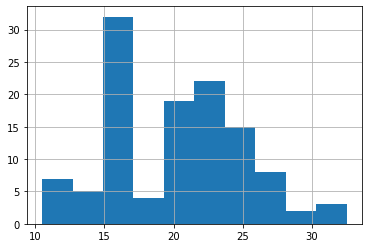

In [63]:
cars_2008.hist()

<AxesSubplot:>

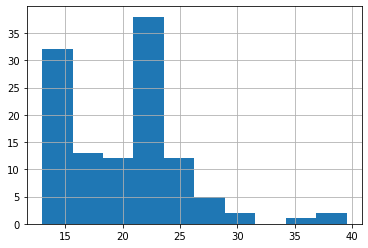

In [64]:
cars_1999.hist()

In [65]:
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [67]:
# compute test statistic and probability (t-statistic & p-value)

t,p = stats.ttest_ind(cars_2008, cars_1999)

t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [68]:
#Since p is greater than our alpha, we fail to reject the null hypothesis. 
#There is not sufficient evidence to suggest fuel efficiencies are different 
# for cars made in 1999 or 2008.

##  #Set Hypothesis

$H_{0}$: Mean of fuel efficiency 1999 = mean of fuel efficiency 2008

$H_{a}$: Mean of fuel efficiency 1999 > mean of fuel efficiency 2008

In [69]:
# Set alpha

alpha = 0.05

In [41]:
# verify assumptions

#What is the fuel efficiency for cars from 1999 - 2008?
mpg_df.hwy.value_counts().head(5)

26    32
17    31
29    22
25    15
27    14
Name: hwy, dtype: int64

In [71]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


### Are compact cars more fuel-efficient than the average car?


$H_{0}$: Compact cars are as fuel efficient as all cars

$H_{a}$: Compact cars are more fuel efficient than average cars.

This will be a one tailed, 1 sample t test.


In [72]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [74]:
mpg = mpg.rename(columns = {'class': "car_type"})
compact_fuel = mpg[mpg.car_type=="compact"].average_mileage

In [75]:
list(mpg['car_type'].unique())

['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup', 'subcompact']

In [78]:
def car_type(x):
    if x == 'compact':
        return 'compact'
    else:
        return 'not_compact'
mpg['is_compact'] = mpg.car_type.apply(car_type)

average_fuel = mpg[mpg.is_compact == 'not_compact'].average_mileage

In [79]:
alpha = 0.05

<AxesSubplot:>

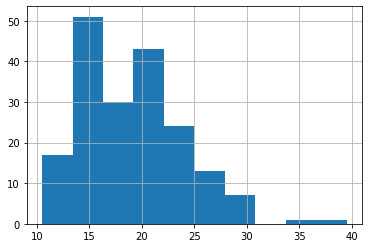

In [81]:
compact_fuel.hist()

<AxesSubplot:>

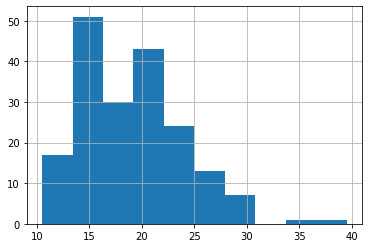

In [82]:
average_fuel.hist()

In [83]:
compact_fuel.var(), average_fuel.var()

(23.652794548904602, 23.652794548904602)

In [85]:
overall_mean = mpg.average_mileage.mean()

In [86]:
t, p, stats.ttest_1samp(compact_fuel, overall_mean)
t, p, alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [ ]:
#P is less than alpha, so we reject null hypothesis.
#There is evidence to suggest compact cars are more fuel efficient than average.

### Do manual cars get better gas mileage than automatic cars?


In [87]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,average_mileage,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact
